Install Dependencies

Libraries

In [12]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

Load the Dataset Adult

In [10]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']

df = pd.read_csv('adult.data', delim_whitespace=False, header=None)

df.columns = col_names

missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)

df.head()

Missing values:
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64


C:\Users\zoian\AppData\Local\Temp\ipykernel_12996\1536665986.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('adult.data', delim_whitespace=False, header=None)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
# encoding
# label_encoder = LabelEncoder()

# for col in df.columns:
#     df[col] = label_encoder.fit_transform(df[col])

# df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0


Feature correlations with target variable

class             1.000000
capital-gain      0.340016
education-num     0.335154
age               0.234134
hours-per-week    0.232393
sex               0.215980
capital-loss      0.162514
education         0.079317
occupation        0.075468
race              0.071846
workclass         0.051604
native-country    0.015840
fnlwgt           -0.010549
marital-status   -0.199307
relationship     -0.250918
Name: class, dtype: float64


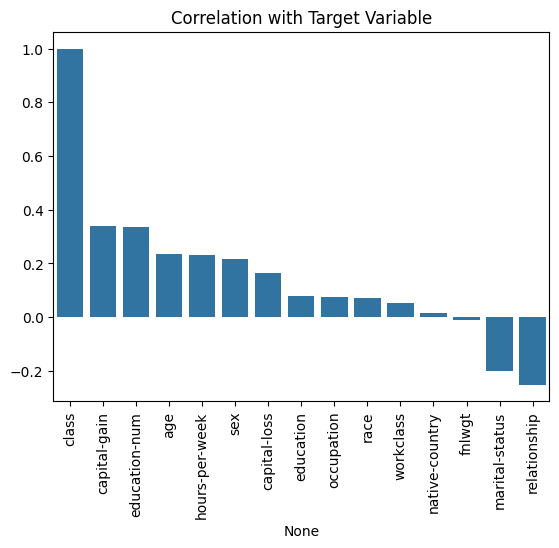

In [13]:
# We want correlation with target variable (class), so:
# data.corr()["class"]
values=df.corr()["class"].sort_values(ascending=False)
print(values)

# Plot the correlation
sns.barplot(x=values.index, y=values.values)
plt.xticks(rotation=90)
plt.title("Correlation with Target Variable")
plt.show()

selected_features_correlation = values[values.abs() > 0.1].index.tolist()
selected_features_correlation.remove("class")  